# Keypoint Detection using Various CNN Architecture
by Elise Wilcher

Dataset: https://www.kaggle.com/competitions/facial-keypoints-detection/overview

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In this google collab we will be going through and testing various CNN models and layering to be able to effectively detect keypoints within a facial dataset. These keypoints are known/measured values that are provided for the dataset. First we will go through a data exploration process to figure out the best way to solve this problem. Upon an initial approach, we will try to solve this in a direct regression point prediction, utilizing CNN layering to extract features and a Dense network following.

# Data Preprocessing for Regression Key Points

In [ ]:
training = pd.read_csv('training.csv')
print(training.head())
print(training.describe())

   left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          66.033564          39.002274           30.227008   
1          64.332936          34.970077           29.949277   
2          65.057053          34.909642           30.903789   
3          65.225739          37.261774           32.023096   
4          66.725301          39.621261           32.244810   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           36.421678                59.582075                39.647423   
1           33.448715                58.856170                35.274349   
2           34.909642                59.412000                36.320968   
3           37.261774                60.003339                39.127179   
4           38.042032                58.565890                39.621261   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                73.130346                39.969997                 36.356571   
1       

(7049,)
(9216,)
(96, 96)


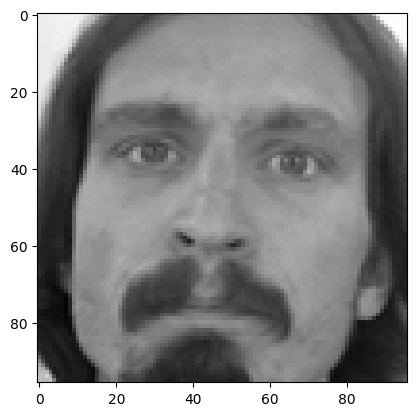

In [ ]:
train_img = training['Image'].to_numpy()
print(train_img.shape)
first = train_img[0]
first = np.fromstring(first, dtype=int, sep=' ')
print(first.shape)
first = first.reshape(96, 96)
print(first.shape)
plt.imshow(first, cmap='gray')
plt.show()

Looking at the information below we see that there is many keypoints that are not prevelent in all of the images. It would not be wise to have output neurons that will not have anough information to make accurate predictions; and may result in neurons always predicting 0 when that is not true. Moving forward we will limit the points that will be predicted to the ones that are most prevelent in all of the images, which is: left eye center, right eye center, nose tip, and center bottom lip.

In [ ]:
num_miss = training.isna().sum()
print(num_miss)

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [ ]:
testing = pd.read_csv('test.csv')
print(testing.head())
print(testing.describe())

   ImageId                                              Image
0        1  182 183 182 182 180 180 176 169 156 137 124 10...
1        2  76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2        3  177 176 174 170 169 169 168 166 166 166 161 14...
3        4  176 174 174 175 174 174 176 176 175 171 165 15...
4        5  50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...
           ImageId
count  1783.000000
mean    892.000000
std     514.852082
min       1.000000
25%     446.500000
50%     892.000000
75%    1337.500000
max    1783.000000


(1783,)
(9216,)
(96, 96)


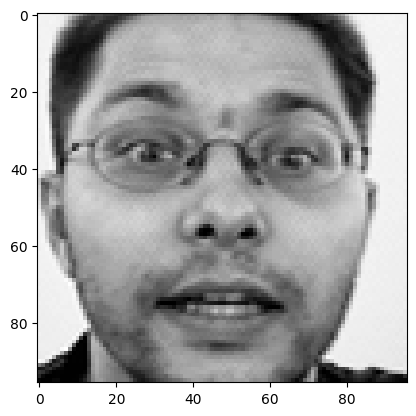

In [ ]:
test_img = testing['Image'].to_numpy()
print(test_img.shape)
first = test_img[0]
first = np.fromstring(first, dtype=int, sep=' ')
print(first.shape)
first = first.reshape(96, 96)
print(first.shape)
plt.imshow(first, cmap='gray')
plt.show()

We are checking the initial amount of data that we have and what our data looks like to see the preprocessing steps we need to take moving forward.

In [ ]:
print(train_img.shape)
print(train_img[:2])

(7049,)
['238 236 237 238 240 240 239 241 241 243 240 239 231 212 190 173 148 122 104 92 79 73 74 73 73 74 81 74 60 64 75 86 93 102 100 105 109 114 121 127 132 134 137 137 140 139 138 137 137 140 141 143 144 147 148 149 147 147 148 145 147 144 146 147 147 143 134 130 130 128 116 104 98 90 82 78 85 88 86 80 77 87 108 111 115 128 133 188 242 252 250 248 251 250 250 250 235 238 236 238 238 237 238 242 241 239 237 233 215 195 187 156 119 103 93 78 68 73 75 75 72 75 70 61 66 77 91 96 106 108 113 120 125 131 134 138 135 138 139 145 144 144 142 140 141 141 148 147 150 149 152 151 149 150 147 148 144 148 144 146 146 143 139 128 132 135 128 112 104 97 87 78 79 83 85 83 75 75 89 109 111 117 117 130 194 243 251 249 250 249 250 251 237 236 237 238 237 238 241 238 238 238 241 221 195 187 163 124 106 95 81 68 70 73 73 72 73 69 65 74 82 94 103 110 111 119 127 135 140 139 144 144 145 143 143 143 146 144 144 147 146 148 147 150 146 147 150 150 149 147 147 144 147 144 149 146 144 144 144 140 131 133 133

In [ ]:
for i in range(len(train_img)):
    train_img[i] = np.fromstring(train_img[i], dtype=int, sep=' ')
print(train_img[:2])
train_img = np.vstack(train_img).astype(np.int64)
train_img = (train_img / 255.0).astype(np.float32)
print(train_img.shape)
print(train_img[:2])
print(train_img.dtype)

[array([238, 236, 237, ...,  70,  75,  90])
 array([219, 215, 204, ...,   1,   1,   1])]
(7049, 9216)
[[0.93333334 0.9254902  0.92941177 ... 0.27450982 0.29411766 0.3529412 ]
 [0.85882354 0.84313726 0.8        ... 0.00392157 0.00392157 0.00392157]]
float32


In [ ]:
labels = training.drop(columns=['left_eye_inner_corner_x', 'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
                                'left_eye_outer_corner_y', 'right_eye_inner_corner_x', 'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
                                'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x', 'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
                                'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x', 'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
                                'right_eyebrow_outer_end_y', 'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x', 'mouth_right_corner_y',
                                'mouth_center_top_lip_x', 'mouth_center_top_lip_y', 'Image']).to_numpy()
print(labels.shape)
print(labels.dtype)
print(labels[:2])

(7049, 8)
float64
[[66.03356391 39.00227368 30.22700752 36.4216782  44.42057143 57.06680301
  43.13070677 84.48577444]
 [64.33293617 34.9700766  29.9492766  33.44871489 48.20629787 55.66093617
  45.46791489 85.48017021]]


In [ ]:
for i in range(len(labels), -1, -1):
    if any(np.isnan(labels[i-1])):
        labels = np.delete(labels, i-1, axis=0)
        train_img = np.delete(train_img, i-1, axis=0)
print(labels.shape)
print(train_img.shape)
print(labels[:2])

(7000, 8)
(7000, 9216)
[[66.03356391 39.00227368 30.22700752 36.4216782  44.42057143 57.06680301
  43.13070677 84.48577444]
 [64.33293617 34.9700766  29.9492766  33.44871489 48.20629787 55.66093617
  45.46791489 85.48017021]]


In [ ]:
for i in range(len(test_img)):
    test_img[i] = np.fromstring(test_img[i], dtype=int, sep=' ')
print(test_img[:2])
test_img = np.vstack(test_img).astype(np.int64)
test_img = (test_img / 255.0).astype(np.float32)
print(test_img.shape)
print(test_img[:2])
print(test_img.dtype)

[array([182, 183, 182, ...,   8,   5,   5])
 array([ 76,  87,  81, ..., 228, 211, 168])]
(1783, 9216)
[[0.7137255  0.7176471  0.7137255  ... 0.03137255 0.01960784 0.01960784]
 [0.29803923 0.34117648 0.31764707 ... 0.89411765 0.827451   0.65882355]]
float32


In [ ]:
train_img = train_img.reshape(train_img.shape[0], 96, 96, 1)
test_img = test_img.reshape(test_img.shape[0], 96, 96, 1)

print(train_img[0].shape)
print(test_img[0].shape)

(96, 96, 1)
(96, 96, 1)


# Data Augmentation for Key Points

The purpose of doing this project was to take the concepts that I learn from this and apply it to my work. In that context a build part can be augmented in any way from mirroring to rotation. So that is what we will implement in this project we will mirror this dataset and rotate it clockwise and counter clockwise.

Mirroring the dataset

In [ ]:
def make_mask(label):
    masks = []
    for i in range(label.shape[0]):
        mask = np.zeros((96, 96, 4), dtype='float32')
        arr = label[i].copy().reshape(4, 2)
        for j in range(len(arr)):
            x, y = arr[j]
            if x == 0 and y == 0:
                continue
            x, y = int(x), int(y)
            ymin, ymax = max(0, y - 2), min(96, y + 3)
            xmin, xmax = max(0, x - 2), min(96, x + 3)
            for a in range(ymin, ymax):
                for b in range(xmin, xmax):
                    mask[a][b][j] = np.exp(-((a - y) ** 2 + (b - x) ** 2) / 2)
        masks.append(mask)
    return np.array(masks)


def extract_points(masks):
  points = []
  for i in range(len(masks)):
    curr = masks[i]
    temp = []
    for j in range(curr.shape[2]):
      x = np.argmax(curr[:, :, j], axis=1)
      y = np.argmax(curr[:, :, j], axis=0)
      x = np.max(x)
      y = np.max(y)
      temp.append(x)
      temp.append(y)
    points.append(temp)
  return np.array(points)

In order to augment the labels of the dataset we had to convert them to heat masks, augment the masks the same way we augment the images, then convert them back into points. Though this is time consuming to convert into masks and back into points, it was the only effective way to make the augmented data.

In [ ]:
v_mirror_train = train_img.copy()
v_mirror_train = v_mirror_train[:, :, ::-1]
v_mask = make_mask(labels)
v_mask = v_mask[:, :, ::-1]
v_points = extract_points(v_mask)

h_mirror_train = train_img.copy()
h_mirror_train = h_mirror_train[:, ::-1, :]
h_mask = make_mask(labels)
h_mask = h_mask[:, ::-1, :]
h_points = extract_points(h_mask)

mirror_train = train_img.copy()
mirror_train = mirror_train[:, ::-1, ::-1]
mirror_mask = make_mask(labels)
mirror_mask = mirror_mask[:, ::-1, ::-1]
mirror_points = extract_points(mirror_mask)

In [ ]:
print(v_mirror_train.shape)
print(v_points.shape)
print(h_mirror_train.shape)
print(h_points.shape)
print(mirror_train.shape)
print(mirror_points.shape)

(7000, 96, 96, 1)
(7000, 8)
(7000, 96, 96, 1)
(7000, 8)
(7000, 96, 96, 1)
(7000, 8)


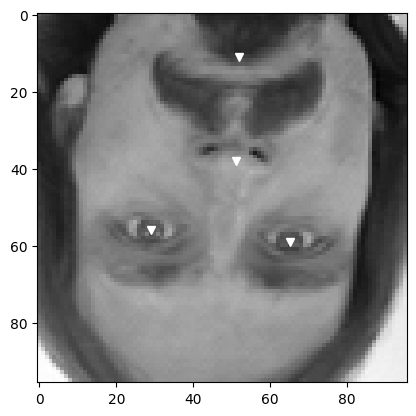

In [ ]:
plt.imshow(mirror_train[0], cmap='gray')
plt.plot(mirror_points[0][0], mirror_points[0][1], marker='v', color="white")
plt.plot(mirror_points[0][2], mirror_points[0][3], marker='v', color="white")
plt.plot(mirror_points[0][4], mirror_points[0][5], marker='v', color="white")
plt.plot(mirror_points[0][6], mirror_points[0][7], marker='v', color="white")
plt.show()

Rotating the dataset

In [ ]:
def rotate_image(img, label, angle):
    center = (img.shape[1] // 2, img.shape[0] // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_img = cv2.warpAffine(img, rotation_matrix, (img.shape[1], img.shape[0]))
    label = label.reshape(96, 96, 4)
    rotated_masks = np.zeros((1, 96, 96, 4))
    for i in range(label.shape[2]):
      rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
      rotated_mask = cv2.warpAffine(label[:, :, i], rotation_matrix, (96, 96))
      rotated_masks[:, :, :, i] = rotated_mask
    rotated_points = extract_points(rotated_masks)
    return rotated_img, rotated_points

In [ ]:
r_train_img = train_img.copy()
r_train_labels = labels.copy()
mask = make_mask(r_train_labels)
for i in range(r_train_img.shape[0]):
  r_train_img[i, :, :, 0], r_train_labels[i] = rotate_image(r_train_img[i, :, :, 0], mask[i], 90)

l_train_img = train_img.copy()
l_train_labels = labels.copy()
mask = make_mask(l_train_labels)
for i in range(l_train_img.shape[0]):
  l_train_img[i, :, :, 0], l_train_labels[i] = rotate_image(l_train_img[i, :, :, 0], mask[i], -90)

In [ ]:
print(r_train_img.shape)
print(r_train_labels.shape)
print(l_train_img.shape)
print(l_train_labels.shape)

(7000, 96, 96, 1)
(7000, 8)
(7000, 96, 96, 1)
(7000, 8)


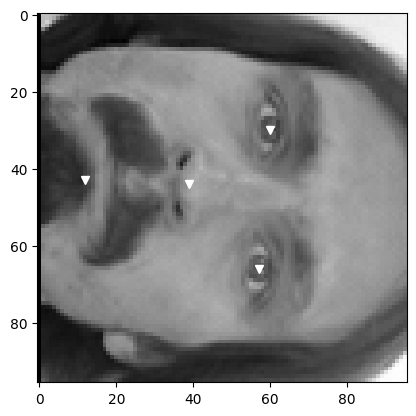

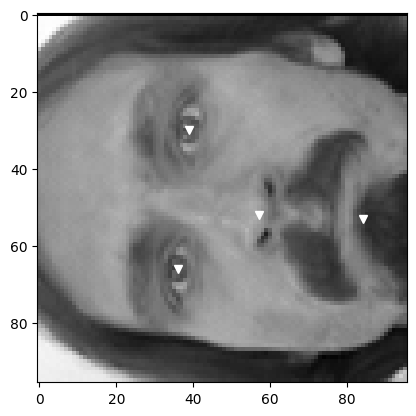

In [ ]:
plt.imshow(l_train_img[0], cmap='gray')
plt.plot(l_train_labels[0][0], l_train_labels[0][1], marker='v', color="white")
plt.plot(l_train_labels[0][2], l_train_labels[0][3], marker='v', color="white")
plt.plot(l_train_labels[0][4], l_train_labels[0][5], marker='v', color="white")
plt.plot(l_train_labels[0][6], l_train_labels[0][7], marker='v', color="white")
plt.show()

plt.imshow(r_train_img[0], cmap='gray')
plt.plot(r_train_labels[0][0], r_train_labels[0][1], marker='v', color="white")
plt.plot(r_train_labels[0][2], r_train_labels[0][3], marker='v', color="white")
plt.plot(r_train_labels[0][4], r_train_labels[0][5], marker='v', color="white")
plt.plot(r_train_labels[0][6], r_train_labels[0][7], marker='v', color="white")
plt.show()

In [ ]:
total_train = np.concatenate((train_img, v_mirror_train, h_mirror_train, mirror_train, l_train_img, r_train_img), axis=0)
total_labels = np.concatenate((labels, v_points, h_points, mirror_points, l_train_labels, r_train_labels), axis=0)

permutation = np.random.permutation(total_train.shape[0])
total_train = total_train[permutation]
total_labels = total_labels[permutation]

print(total_train.shape)
print(total_labels.shape)

(42000, 96, 96, 1)
(42000, 8)


# Model Testing

For the custom CNN models I set all the filters to be the same number and the number of parameters for the dense portion to be the exact same to provide a fair playing field to see which CNN layers can extract the best information for finding keypoints. I tested using maximum features (Maxpooling), average features (Average pooling), batch normalization, and a resnet block. The only portion that had a different number of filters was the modified ResNet model, however, it had almost 1 million less parameters. I set all the training metrics to be the same with root mean squared error being used to analyze how the regressor was doing. I encorporated this metric since it is more prone to large errors which is something that is very important in this project because large errors could mean missing the entire facial feature where the point is suppose to lie. Something that was prevelent with all of the training was that all of the models converged very quickly. We implemented early stopping due to the amount of time that it took to get through one epoch. This slow down may be due to multiplying our original dataset 6 times. However, even with the quick convergence many of the models did well in finding the facial keypoints.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import register_keras_serializable

In [ ]:
def plot_results(history):
    fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
    ax[0].plot(history.history['root_mean_squared_error'], label='train')
    ax[0].plot(history.history['val_root_mean_squared_error'], label='val')
    ax[0].set_title('Root Mean Squared Error')
    ax[0].legend(loc='upper right')
    ax[1].plot(history.history['loss'], label='train')
    ax[1].plot(history.history['val_loss'], label='val')
    ax[1].set_title('Loss')
    ax[1].legend(loc='upper right')
    plt.tight_layout()
    plt.show()

In [ ]:
def cnn_block_max(x):
  x = layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)
  x = layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(x)
  x = layers.MaxPooling2D(pool_size=(2, 2))(x)
  return x

In [ ]:
def cnn_block_avg(x):
  x = layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)
  x = layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(x)
  x = layers.AveragePooling2D(pool_size=(2, 2))(x)
  return x

In [ ]:
def cnn_block_batch_max(x):
  x = layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)
  x = layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(x)
  x = layers.BatchNormalization()(x)
  x = layers.MaxPooling2D(pool_size=(2, 2))(x)
  return x

In [ ]:
def cnn_block_batch_avg(x):
  x = layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)
  x = layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(x)
  x = layers.BatchNormalization()(x)
  x = layers.AveragePooling2D(pool_size=(2, 2))(x)
  return x

In [ ]:
def res_block(x, filters, strides=1):
    x_identity = x
    x = layers.Conv2D(filters=filters, kernel_size=(3, 3), strides=strides, padding='same', activation='relu')(x)
    x = layers.Conv2D(filters=filters, kernel_size=(3, 3), padding='same', activation='relu')(x)
    if x_identity.shape[-1] != filters or strides != 1:
        x_identity = layers.Conv2D(filters=filters, kernel_size=(1, 1), strides=strides, padding='same')(x_identity)
    x = layers.Add()([x, x_identity])
    x = layers.ReLU()(x)
    return x

In [ ]:
def model_1(input_shape):
  input = layers.Input(shape=input_shape)
  x = cnn_block_max(input)
  x = cnn_block_max(x)
  x = cnn_block_max(x)
  x = layers.Flatten()(x)
  x = layers.Dense(256, activation='relu')(x)
  x = layers.Dense(128, activation='relu')(x)
  x = layers.Dense(64, activation='relu')(x)
  out = layers.Dense(8)(x)
  model = keras.Model(inputs=input, outputs=out)
  return model

In [ ]:
def model_2(input_shape):
  input = layers.Input(shape=input_shape)
  x = cnn_block_avg(input)
  x = cnn_block_avg(x)
  x = cnn_block_avg(x)
  x = layers.Flatten()(x)
  x = layers.Dense(256, activation='relu')(x)
  x = layers.Dense(128, activation='relu')(x)
  x = layers.Dense(64, activation='relu')(x)
  out = layers.Dense(8)(x)
  model = keras.Model(inputs=input, outputs=out)
  return model

In [ ]:
def model_3(input_shape):
  input = layers.Input(shape=input_shape)
  x = cnn_block_batch_max(input)
  x = cnn_block_batch_max(x)
  x = cnn_block_batch_max(x)
  x = layers.Flatten()(x)
  x = layers.Dense(256, activation='relu')(x)
  x = layers.Dense(128, activation='relu')(x)
  x = layers.Dense(64, activation='relu')(x)
  out = layers.Dense(8)(x)
  model = keras.Model(inputs=input, outputs=out)
  return model

In [ ]:
def model_4(input_shape):
  input = layers.Input(shape=input_shape)
  x = cnn_block_batch_avg(input)
  x = cnn_block_batch_avg(x)
  x = cnn_block_batch_avg(x)
  x = layers.Flatten()(x)
  x = layers.Dense(256, activation='relu')(x)
  x = layers.Dense(128, activation='relu')(x)
  x = layers.Dense(64, activation='relu')(x)
  out = layers.Dense(8)(x)
  model = keras.Model(inputs=input, outputs=out)
  return model

In [ ]:
def model_5(input_shape):
  input = layers.Input(shape=input_shape)
  x = layers.Conv2D(filters=64, kernel_size=(7, 7), strides=2, activation='relu')(input)
  x = layers.MaxPooling2D(pool_size=(2, 2))(x)
  x = res_block(x, 64)
  x = res_block(x, 64)
  x = res_block(x, 64)
  x = res_block(x, 128, strides=2)
  x = res_block(x, 128)
  x = res_block(x, 128)
  x = res_block(x, 128)
  x = res_block(x, 256, strides=2)
  x = res_block(x, 256)
  x = res_block(x, 256)
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Dense(256, activation='relu')(x)
  x = layers.Dense(128, activation='relu')(x)
  x = layers.Dense(64, activation='relu')(x)
  out = layers.Dense(8)(x)
  model = keras.Model(inputs=input, outputs=out)
  return model

In [ ]:
model = model_1((96, 96, 1))
model.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 96, 96, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 96, 96, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 96, 96, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 48, 48, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 48, 48, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 48, 48, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 24, 24, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,130,312 (19.57 MB)

 Trainable params: 5,130,312 (19.57 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 80s 66ms/step - loss: 299.4734 - root_mean_squared_error: 16.7840 - val_loss: 70.2180 - val_root_mean_squared_error: 8.3796
Epoch 2/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 66s 59ms/step - loss: 70.3448 - root_mean_squared_error: 8.3868 - val_loss: 68.6247 - val_root_mean_squared_error: 8.2840
Epoch 3/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 63s 60ms/step - loss: 65.9789 - root_mean_squared_error: 8.1227 - val_loss: 62.5658 - val_root_mean_squared_error: 7.9099
Epoch 4/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 82s 60ms/step - loss: 63.0531 - root_mean_squared_error: 7.9405 - val_loss: 60.3292 - val_root_mean_squared_error: 7.7672
Epoch 5/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 81s 58ms/step - loss: 58.2804 - root_mean_squared_error: 7.6340 - val_loss: 62.4927 - val_root_mean_squared_error: 7.9052
Epoch 6/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 83s 59ms/step - loss: 53.5905 - root_mean_squared_error: 7.3204 - val_loss: 56.9031 - val_root_mean_squared_error: 7.5434
Epoch 7/50
105

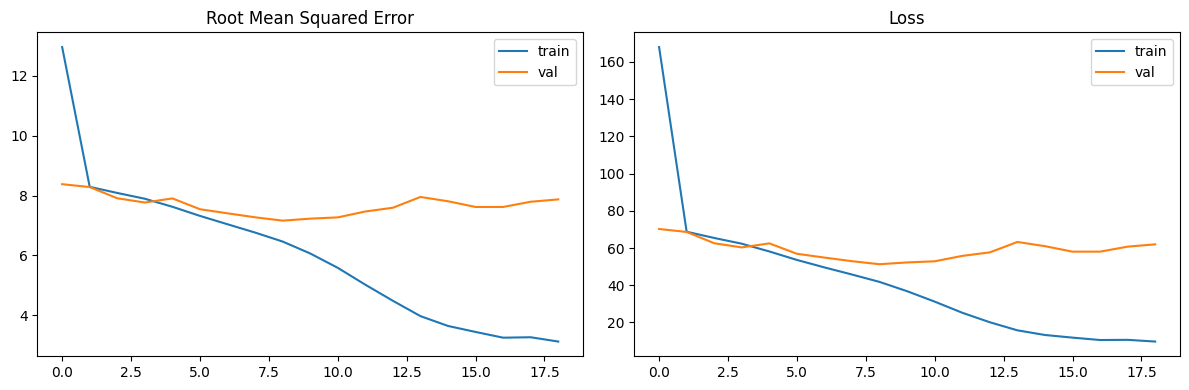

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

history = model.fit(total_train, total_labels, epochs=50, batch_size=32, validation_split=0.2, callbacks=[es])
plot_results(history)

In [ ]:
pred = model.predict(test_img)
print(pred.shape)
print(pred[:2])

56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step
(1783, 8)
[[35.638462 36.93719  60.24266  35.827316 48.84432  51.348946 46.53752
  89.16417 ]
 [71.774025 37.9339   29.597967 41.2262   52.236217 63.87534  54.051598
  88.20213 ]]


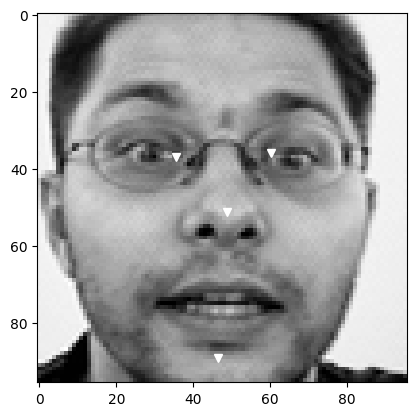

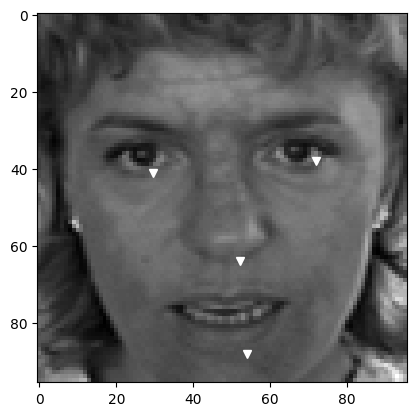

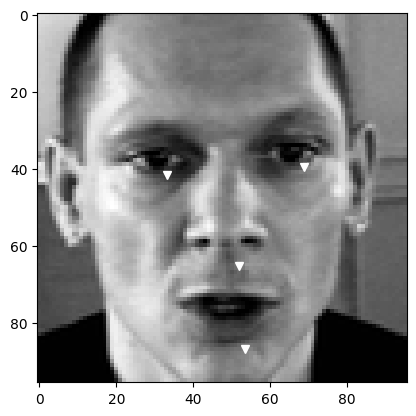

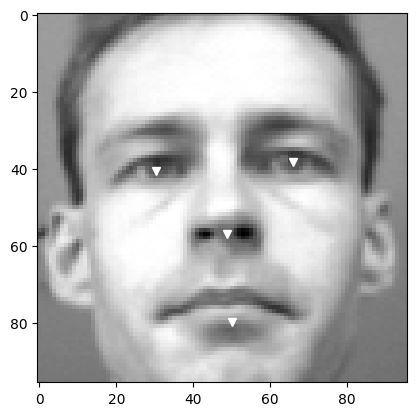

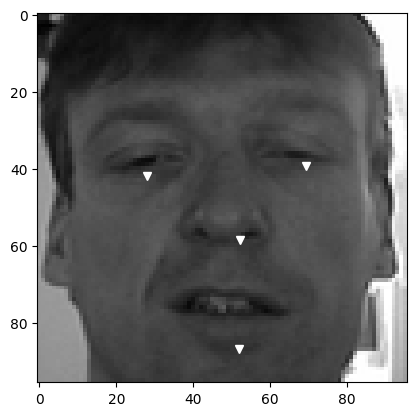

In [ ]:
for i in range(5):
  plt.imshow(test_img[i], cmap='gray')
  plt.plot(pred[i][0], pred[i][1], marker='v', color="white")
  plt.plot(pred[i][2], pred[i][3], marker='v', color="white")
  plt.plot(pred[i][4], pred[i][5], marker='v', color="white")
  plt.plot(pred[i][6], pred[i][7], marker='v', color="white")
  plt.show()

In [ ]:
model = model_2((96, 96, 1))
model.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 96, 96, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 96, 96, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 96, 96, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 48, 48, 128)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 48, 48, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 48, 48, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 24, 24, 128)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 24, 24, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 12, 12, 128)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,130,312 (19.57 MB)

 Trainable params: 5,130,312 (19.57 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 61s 57ms/step - loss: 254.2851 - root_mean_squared_error: 15.9104 - val_loss: 73.7610 - val_root_mean_squared_error: 8.5884
Epoch 2/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 80s 55ms/step - loss: 73.0964 - root_mean_squared_error: 8.5491 - val_loss: 69.7827 - val_root_mean_squared_error: 8.3536
Epoch 3/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 58s 55ms/step - loss: 69.1322 - root_mean_squared_error: 8.3144 - val_loss: 66.0187 - val_root_mean_squared_error: 8.1252
Epoch 4/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 83s 55ms/step - loss: 66.6375 - root_mean_squared_error: 8.1631 - val_loss: 64.9903 - val_root_mean_squared_error: 8.0617
Epoch 5/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 57s 54ms/step - loss: 64.4481 - root_mean_squared_error: 8.0279 - val_loss: 66.0681 - val_root_mean_squared_error: 8.1282
Epoch 6/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - loss: 63.6827 - root_mean_squared_error: 7.9797 - val_loss: 61.6208 - val_root_mean_squared_error: 7.8499
Epoch 7/50
105

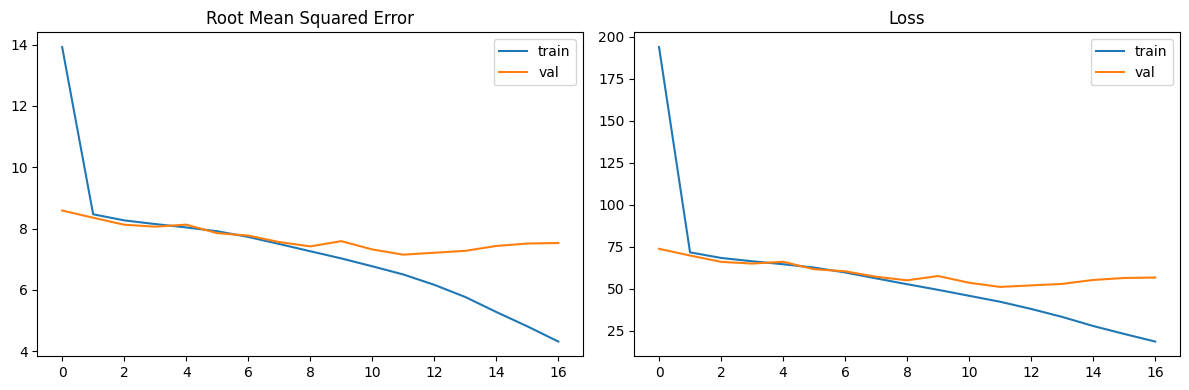

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

history = model.fit(total_train, total_labels, epochs=50, batch_size=32, validation_split=0.2, callbacks=[es])
plot_results(history)

In [ ]:
pred = model.predict(test_img)
print(pred.shape)
print(pred[:2])

56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
(1783, 8)
[[46.840298 33.318966 40.633427 36.653515 43.946854 45.106586 44.050205
  81.51458 ]
 [70.683174 36.33936  27.482767 36.600616 49.26361  57.22006  51.323162
  88.86669 ]]


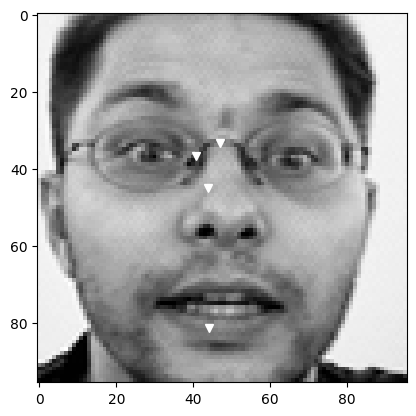

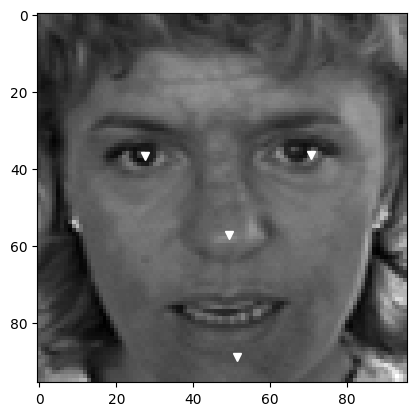

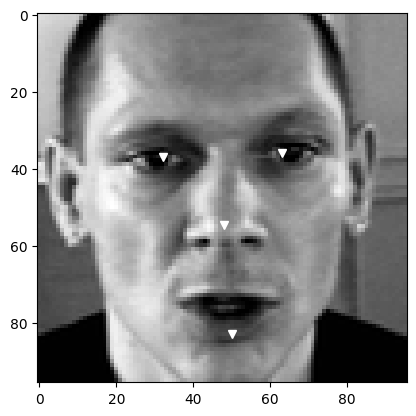

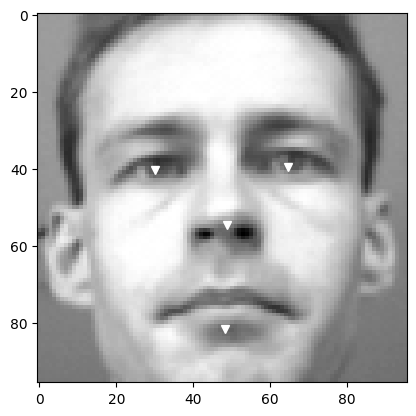

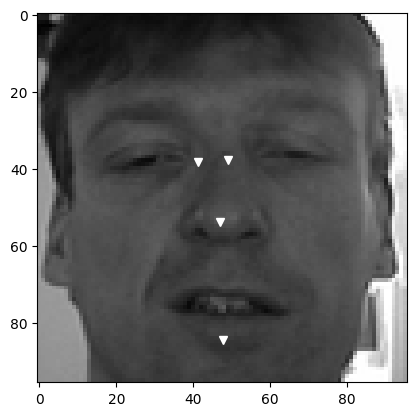

In [ ]:
for i in range(5):
  plt.imshow(test_img[i], cmap='gray')
  plt.plot(pred[i][0], pred[i][1], marker='v', color="white")
  plt.plot(pred[i][2], pred[i][3], marker='v', color="white")
  plt.plot(pred[i][4], pred[i][5], marker='v', color="white")
  plt.plot(pred[i][6], pred[i][7], marker='v', color="white")
  plt.show()

From the first two models, we can see that using the average features did better in the validation error than the maximum features. However, in the testing phase we can see that there are some issues that are occuring that do not align with that result. It seems that in images where a person has glasses or is in low lighting where their eyes may not be as noticable, using the maximum features helps in those cases. Though, in images where those issues are not present the average features provide more precision than the max features. These layers can be used in different contexts, meaning that when key correlations are hard to be made due to noise or some obstruction, utilizing the maximum values for those regions may help. While if there is very low noise prevelent or there are more consistent correlations to be made, utilizing the average values may be best in providing a precise performance.

In [ ]:
model = model_3((96, 96, 1))
model.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 96, 96, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 96, 96, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 96, 96, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 96, 96, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 48, 48, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 48, 48, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 48, 48, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48, 48, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 24, 24, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,131,848 (19.58 MB)

 Trainable params: 5,131,080 (19.57 MB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 77s 65ms/step - loss: 137.1991 - root_mean_squared_error: 11.1131 - val_loss: 139.7098 - val_root_mean_squared_error: 11.8199
Epoch 2/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 67s 63ms/step - loss: 56.9851 - root_mean_squared_error: 7.5485 - val_loss: 59.1371 - val_root_mean_squared_error: 7.6901
Epoch 3/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 83s 64ms/step - loss: 50.9870 - root_mean_squared_error: 7.1405 - val_loss: 78.8349 - val_root_mean_squared_error: 8.8789
Epoch 4/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 66s 62ms/step - loss: 44.1977 - root_mean_squared_error: 6.6474 - val_loss: 58.5707 - val_root_mean_squared_error: 7.6532
Epoch 5/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 66s 63ms/step - loss: 37.9640 - root_mean_squared_error: 6.1613 - val_loss: 54.8154 - val_root_mean_squared_error: 7.4037
Epoch 6/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 83s 64ms/step - loss: 29.3937 - root_mean_squared_error: 5.4208 - val_loss: 54.6496 - val_root_mean_squared_error: 7.3925
Epoch 7/50
1

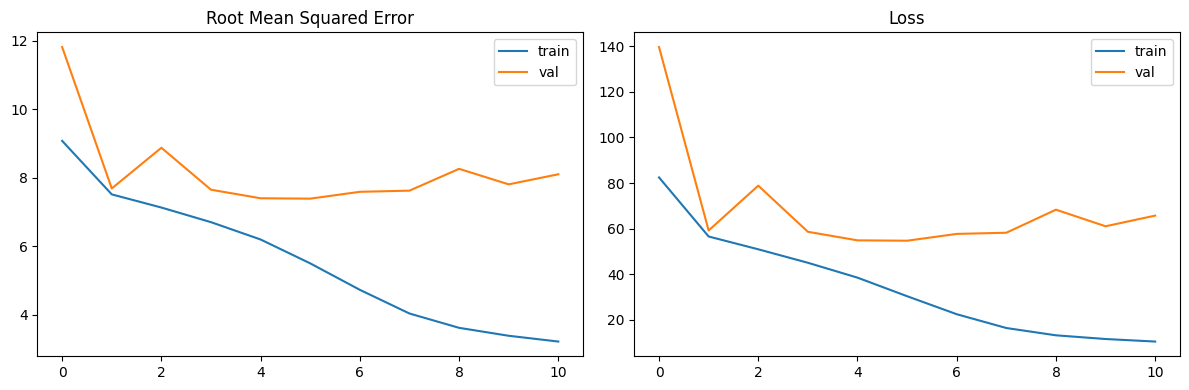

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

history = model.fit(total_train, total_labels, epochs=50, batch_size=32, validation_split=0.2, callbacks=[es])
plot_results(history)

In [ ]:
pred = model.predict(test_img)
print(pred.shape)
print(pred[:2])

56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
(1783, 8)
[[53.9154   36.904053 37.60533  34.256687 47.77702  47.615017 46.85323
  80.24154 ]
 [62.02231  32.429565 24.880686 33.322998 45.94355  57.95341  45.124653
  81.63976 ]]


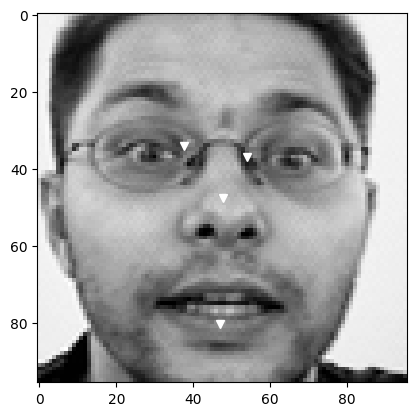

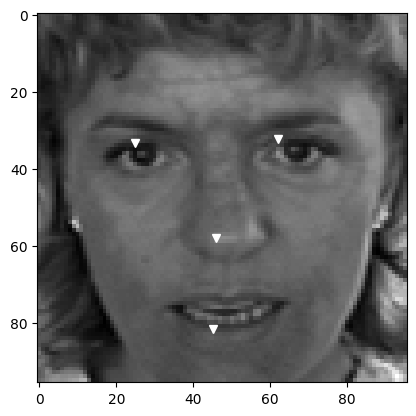

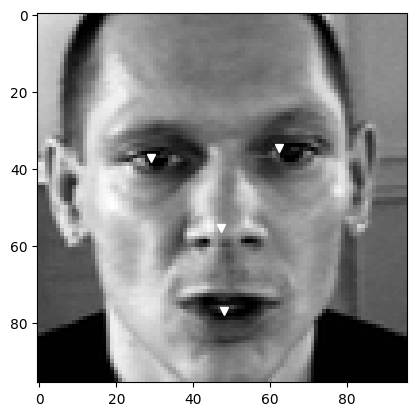

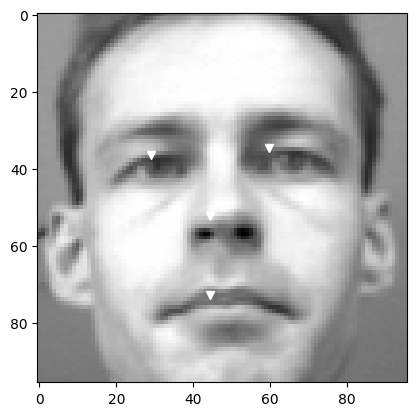

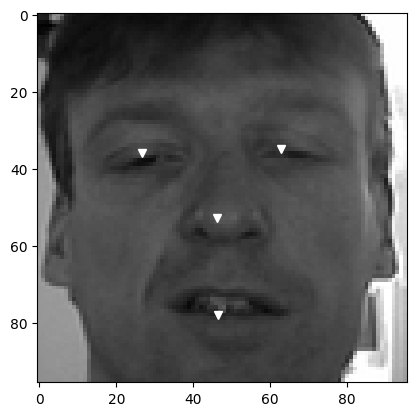

In [ ]:
for i in range(5):
  plt.imshow(test_img[i], cmap='gray')
  plt.plot(pred[i][0], pred[i][1], marker='v', color="white")
  plt.plot(pred[i][2], pred[i][3], marker='v', color="white")
  plt.plot(pred[i][4], pred[i][5], marker='v', color="white")
  plt.plot(pred[i][6], pred[i][7], marker='v', color="white")
  plt.show()

In [ ]:
model = model_4((96, 96, 1))
model.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 96, 96, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 96, 96, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 96, 96, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 96, 96, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 48, 48, 128)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 48, 48, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48, 48, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 24, 24, 128)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 12, 12, 128)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,131,848 (19.58 MB)

 Trainable params: 5,131,080 (19.57 MB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 82s 65ms/step - loss: 144.5621 - root_mean_squared_error: 11.3036 - val_loss: 65.9931 - val_root_mean_squared_error: 8.1236
Epoch 2/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 69s 62ms/step - loss: 56.4269 - root_mean_squared_error: 7.5114 - val_loss: 60.6643 - val_root_mean_squared_error: 7.7887
Epoch 3/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 65s 62ms/step - loss: 49.5271 - root_mean_squared_error: 7.0375 - val_loss: 57.9388 - val_root_mean_squared_error: 7.6118
Epoch 4/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 82s 62ms/step - loss: 43.7093 - root_mean_squared_error: 6.6112 - val_loss: 59.5785 - val_root_mean_squared_error: 7.7187
Epoch 5/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 81s 61ms/step - loss: 36.8655 - root_mean_squared_error: 6.0715 - val_loss: 51.9097 - val_root_mean_squared_error: 7.2048
Epoch 6/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 82s 61ms/step - loss: 27.2851 - root_mean_squared_error: 5.2233 - val_loss: 56.4022 - val_root_mean_squared_error: 7.5101
Epoch 7/50
105

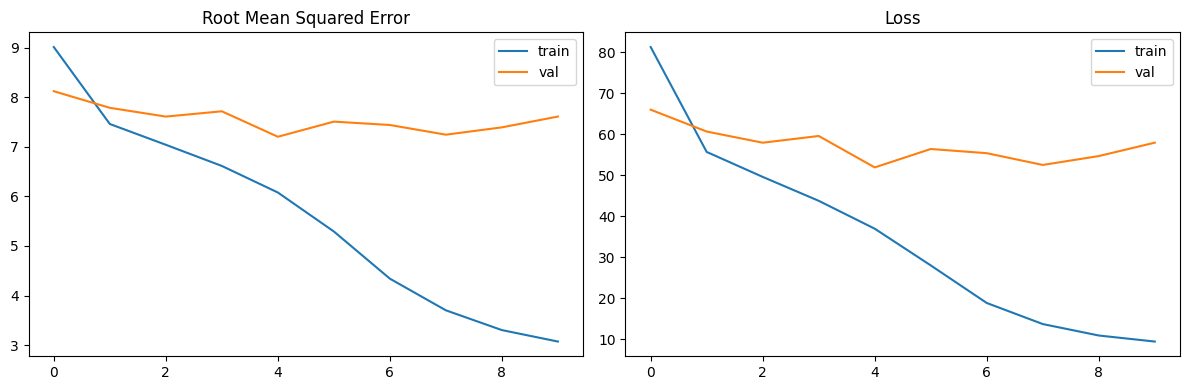

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

history = model.fit(total_train, total_labels, epochs=50, batch_size=32, validation_split=0.2, callbacks=[es])
plot_results(history)

In [ ]:
pred = model.predict(test_img)
print(pred.shape)
print(pred[:2])

56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step
(1783, 8)
[[58.588787 37.63607  39.39935  33.932198 47.756214 50.556496 46.947803
  90.84249 ]
 [65.19872  35.24863  28.396109 36.242374 46.016342 56.82881  45.72988
  85.47432 ]]


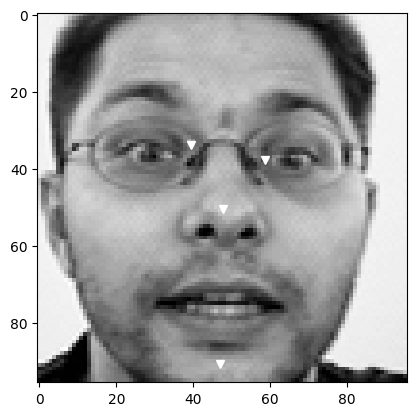

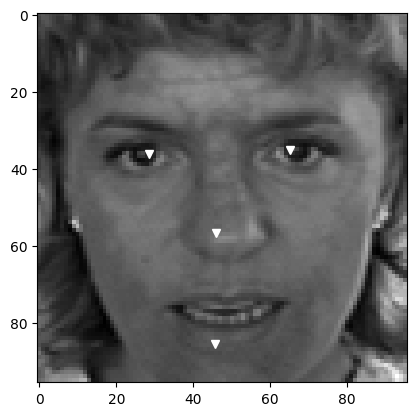

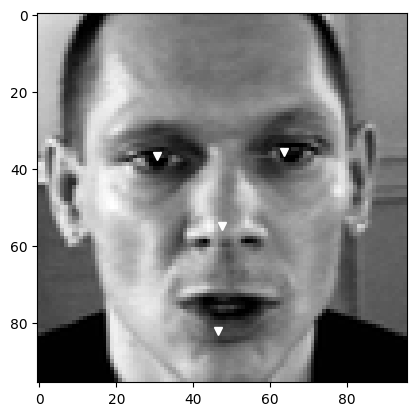

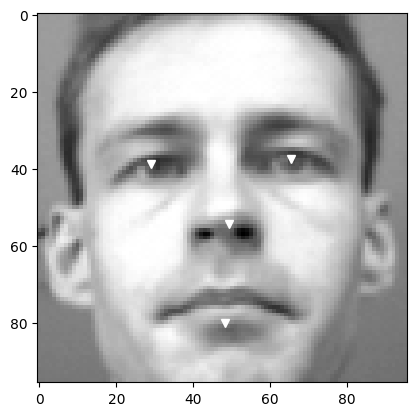

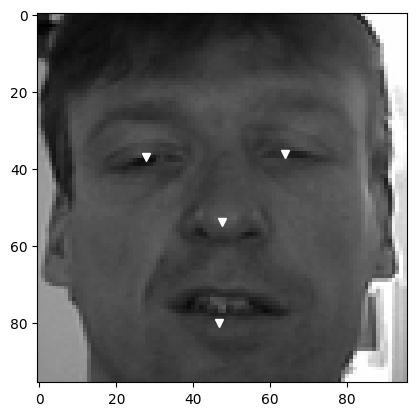

In [ ]:
for i in range(5):
  plt.imshow(test_img[i], cmap='gray')
  plt.plot(pred[i][0], pred[i][1], marker='v', color="white")
  plt.plot(pred[i][2], pred[i][3], marker='v', color="white")
  plt.plot(pred[i][4], pred[i][5], marker='v', color="white")
  plt.plot(pred[i][6], pred[i][7], marker='v', color="white")
  plt.show()

The 3rd and the 4th model are the same as the first and second, though, batch normalization is implemented. Batch normalization helps models have a faster and smoother training process due to providing smoothing to the gradients during the optimization process. Even though the models do not significantly improve in performance during the testing phase nor the training phase, it did speed up the training process significantly helping the average pooling model reach a optima in the 5th epoch. By utilizing this technique in my work we can significantly optimize the training process for our models since the amount of data that will be used will slow down this process and all the help to push for a faster convergence is needed.

In [ ]:
model = model_5((96, 96, 1))
model.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 96, 96, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 45, 45,    │      3,200 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 22, 22,    │          0 │ conv2d_6[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 22, 22,    │     36,928 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 22, 22,    │     36,928 │ conv2d_7[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 22, 22,    │          0 │ conv2d_8[0][0],   │
│                     │ 64)               │            │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 22, 22,    │          0 │ add[0][0]         │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 22, 22,    │     36,928 │ re_lu[0][0]       │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 22, 22,    │     36,928 │ conv2d_9[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 22, 22,    │          0 │ conv2d_10[0][0],  │
│                     │ 64)               │            │ re_lu[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 22, 22,    │          0 │ add_1[0][0]       │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 22, 22,    │     36,928 │ re_lu_1[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 22, 22,    │     36,928 │ conv2d_11[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 22, 22,    │          0 │ conv2d_12[0][0],  │
│                     │ 64)               │            │ re_lu_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 22, 22,    │          0 │ add_2[0][0]       │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 11, 11,    │     73,856 │ re_lu_2[0][0]     │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 11, 11,    │    147,584 │ conv2d_13[0][0] 

 Total params: 4,726,088 (18.03 MB)

 Trainable params: 4,726,088 (18.03 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 52s 35ms/step - loss: 399.3851 - root_mean_squared_error: 19.4408 - val_loss: 105.3564 - val_root_mean_squared_error: 10.2643
Epoch 2/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 31ms/step - loss: 95.6018 - root_mean_squared_error: 9.7744 - val_loss: 80.2051 - val_root_mean_squared_error: 8.9557
Epoch 3/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - loss: 82.2201 - root_mean_squared_error: 9.0672 - val_loss: 76.6516 - val_root_mean_squared_error: 8.7551
Epoch 4/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - loss: 76.8639 - root_mean_squared_error: 8.7671 - val_loss: 77.8423 - val_root_mean_squared_error: 8.8228
Epoch 5/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 31ms/step - loss: 74.7088 - root_mean_squared_error: 8.6434 - val_loss: 71.9874 - val_root_mean_squared_error: 8.4845
Epoch 6/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - loss: 71.9738 - root_mean_squared_error: 8.4836 - val_loss: 69.1594 - val_root_mean_squared_error: 8.3162
Epoch 7/50
1

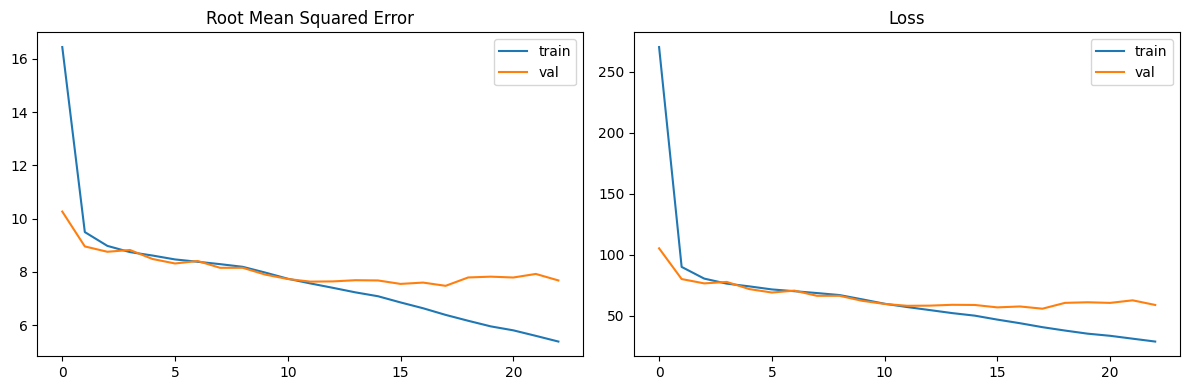

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

history = model.fit(total_train, total_labels, epochs=50, batch_size=32, validation_split=0.2, callbacks=[es])
plot_results(history)

In [ ]:
pred = model.predict(test_img)
print(pred.shape)
print(pred[:2])

56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step
(1783, 8)
[[29.100021 37.02536  65.88997  35.051544 48.934967 54.11446  49.86025
  82.88674 ]
 [64.90608  35.438095 29.62053  37.044643 49.38774  60.255196 48.086544
  83.22225 ]]


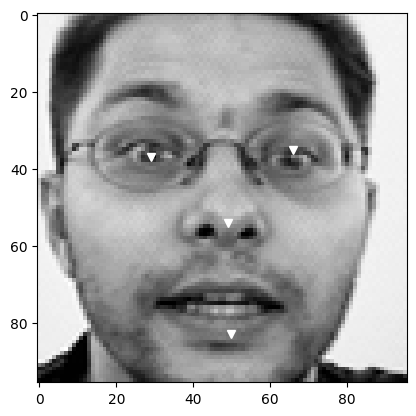

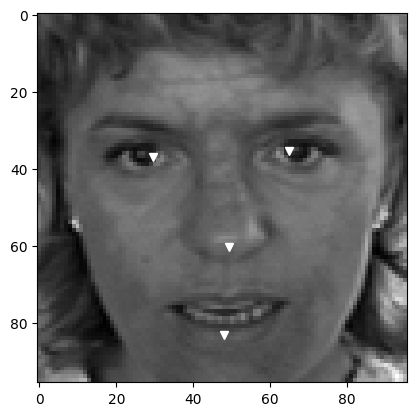

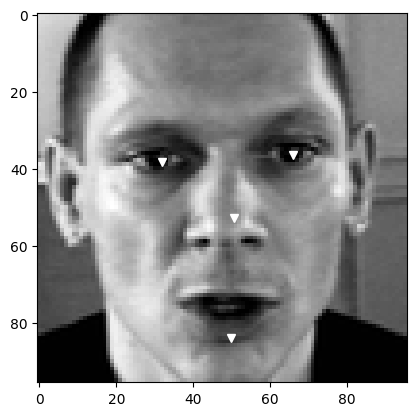

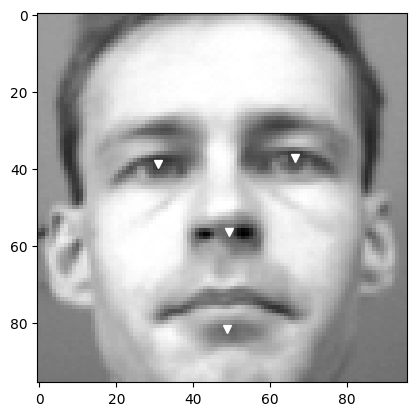

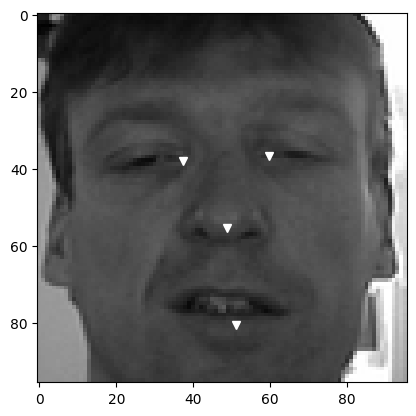

In [ ]:
for i in range(5):
  plt.imshow(test_img[i], cmap='gray')
  plt.plot(pred[i][0], pred[i][1], marker='v', color="white")
  plt.plot(pred[i][2], pred[i][3], marker='v', color="white")
  plt.plot(pred[i][4], pred[i][5], marker='v', color="white")
  plt.plot(pred[i][6], pred[i][7], marker='v', color="white")
  plt.show()

Finally, the modified ResNet model performed very well in the testing phase, though was very average in the validation phase of training. This model provides a very good mix of finding the max features and being somewhat percise. I believe this is due to the utilization of a skip connection or identity matrix in the blocks. This allows to keep some version of what it was before and mix it with what it learns in that layer. Additionally, the skip connection helps mitigate the bottleneck in the optimization process, though it does take longer to converge than the batch normalization models. Overall, I believe the ResNet model provides a good mix of performance, though the max and average feature models do out perform it in the validation metric of training. I believe with more finetuning the model could be a good a good fit in finding keypoints.

# Data Preprocess for Heat Mask

The second way to go about finding keypoints is to predict heatmaps instead of having to use exact point location. Though there is always a way to extract points from a heatmap, this allows for training on keypoints that were not labeled for every image. The heatmap may be less prevelent for those points, but will still have some prediction for those cases that may be useful. In relation to my work this is very important because we are trying to understand the correlation of the build features to regions of interest. So by predicting heatmaps it will be more helpful to gaining a better understanding than an exact pore location.

In [ ]:
training = pd.read_csv('training.csv')
testing = pd.read_csv('test.csv')

train_img = training['Image'].to_numpy()
test_img = testing['Image'].to_numpy()

for i in range(len(train_img)):
    train_img[i] = np.fromstring(train_img[i], dtype=int, sep=' ')
train_img = np.vstack(train_img).astype(np.int64)
train_img = (train_img / 255.0).astype(np.float32)

for i in range(len(test_img)):
    test_img[i] = np.fromstring(test_img[i], dtype=int, sep=' ')
test_img = np.vstack(test_img).astype(np.int64)
test_img = (test_img / 255.0).astype(np.float32)

In [ ]:
labels = training.drop(columns='Image')
labels = labels.fillna(0)
labels = labels.to_numpy()
labels.shape

(7049, 30)

In [ ]:
def pre_process(img, label):
    img_filtered = []
    label_filtered = []
    for i in range(len(img)):
        if not all(label[i] == 0):
            img_filtered.append(img[i])
            label_filtered.append(label[i].reshape(15, 2))
    return np.array(img_filtered), np.array(label_filtered)

In [ ]:
train_img, labels = pre_process(train_img, labels)
labels.shape

(7049, 15, 2)

In [ ]:
def make_mask(label):
    masks = []
    for i in range(len(label)):
        mask = np.zeros((96, 96, 15), dtype='float32')
        for j in range(len(label[i])):
            x, y = label[i][j]
            if x == 0 and y == 0:
                continue
            x, y = int(x), int(y)
            ymin, ymax = max(0, y - 2), min(96, y + 3)
            xmin, xmax = max(0, x - 2), min(96, x + 3)
            for a in range(ymin, ymax):
                for b in range(xmin, xmax):
                    mask[a][b][j] = np.exp(-((a - y) ** 2 + (b - x) ** 2) / 2)
        masks.append(mask)
    return np.array(masks)

In [ ]:
masks = make_mask(labels)
masks.shape

(7049, 96, 96, 15)

In [ ]:
train_img = train_img.reshape(train_img.shape[0], 96, 96, 1)
train_img.shape
test_img = test_img.reshape(test_img.shape[0], 96, 96, 1)
test_img.shape

(1783, 96, 96, 1)

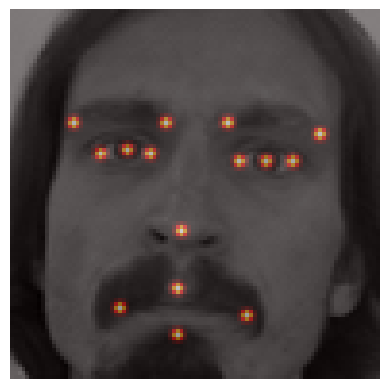

In [ ]:
plt.imshow(train_img[0], cmap='gray')
show = np.sum(masks[0], axis=2)
plt.imshow(show, cmap='hot', alpha=0.5)
plt.axis('off')
plt.show()

# HRNet

Code from: https://github.com/fastestimator/fastestimator/blob/master/apphub/keypoint_detection/hrnet/hrnet.ipynb

In [ ]:
@register_keras_serializable()
def resblock(inputs, filters):
    x = layers.Conv2D(filters=filters, kernel_size=1, padding="same", use_bias=False)(inputs)
    x = layers.BatchNormalization(momentum=0.9)(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(filters=filters, kernel_size=3, padding="same", use_bias=False)(x)
    x = layers.BatchNormalization(momentum=0.9)(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(filters=filters * 2, kernel_size=1, padding="same", use_bias=False)(x)
    x = layers.BatchNormalization(momentum=0.9)(x)
    if inputs.shape[-1] != filters * 2:
        inputs = layers.Conv2D(filters=filters * 2, kernel_size=1, padding="same", use_bias=False)(inputs)
        inputs = layers.BatchNormalization(momentum=0.9)(inputs)
    x = x + inputs
    x = layers.ReLU()(x)
    return x

@register_keras_serializable()
def transition_branch(x, c_out):
    num_branch_in, num_branch_out = len(x), len(c_out)
    x = x + [x[-1] for _ in range(num_branch_out - num_branch_in)]  # padding the list x with x[-1]
    x_new = []
    for idx, (x_i, c_i) in enumerate(zip(x, c_out)):
        if idx < num_branch_in:
            if x_i.shape[-1] != c_i:
                x_i = layers.Conv2D(filters=c_i, kernel_size=3, padding="same", use_bias=False)(x_i)
                x_i = layers.BatchNormalization(momentum=0.9)(x_i)
                x_i = layers.ReLU()(x_i)
        else:
            filter_in = x_i.shape[-1]
            for j in range(idx + 1 - num_branch_in):
                filter_out = c_i if j == idx - num_branch_in else filter_in
                x_i = layers.Conv2D(filters=filter_out, kernel_size=3, strides=2, padding="same", use_bias=False)(x_i)
                x_i = layers.BatchNormalization(momentum=0.9)(x_i)
                x_i = layers.ReLU()(x_i)
        x_new.append(x_i)
    return x_new

@register_keras_serializable()
def basic_block(inputs, filters):
    x = layers.Conv2D(filters=filters, kernel_size=3, padding="same", use_bias=False)(inputs)
    x = layers.BatchNormalization(momentum=0.9)(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(filters=filters, kernel_size=3, padding="same", use_bias=False)(x)
    x = layers.BatchNormalization(momentum=0.9)(x)
    if inputs.shape[-1] != filters:
        inputs = layers.Conv2D(filters=filters, kernel_size=1, padding="same", use_bias=False)(inputs)
        inputs = layers.BatchNormalization(momentum=0.9)(inputs)
    x = x + inputs
    x = layers.ReLU()(x)
    return x

@register_keras_serializable()
def branch_convs(x, num_block, c_out):
    x_new = []
    for x_i, num_conv, c in zip(x, num_block, c_out):
        for _ in range(num_conv):
            x_i = basic_block(x_i, c)
        x_new.append(x_i)
    return x_new

@register_keras_serializable()
def fuse_convs(x, c_out):
    x_new = []
    for idx_out, planes_out in enumerate(c_out):
        x_new_i = []
        for idx_in, x_i in enumerate(x):
            if idx_in > idx_out:
                x_i = layers.Conv2D(filters=planes_out, kernel_size=1, padding="same", use_bias=False)(x_i)
                x_i = layers.BatchNormalization(momentum=0.9)(x_i)
                x_i = layers.UpSampling2D(size=(2**(idx_in - idx_out), 2**(idx_in - idx_out)))(x_i)
            elif idx_in < idx_out:
                for _ in range(idx_out - idx_in - 1):
                    x_i = layers.Conv2D(x_i.shape[-1], kernel_size=3, strides=2, padding="same", use_bias=False)(x_i)
                    x_i = layers.BatchNormalization(momentum=0.9)(x_i)
                    x_i = layers.ReLU()(x_i)
                x_i = layers.Conv2D(planes_out, kernel_size=3, strides=2, padding="same", use_bias=False)(x_i)
                x_i = layers.BatchNormalization(momentum=0.9)(x_i)
            x_new_i.append(x_i)
        x_new.append(layers.ReLU()(layers.Add()(x_new_i)))
    return x_new

@register_keras_serializable()
def hrstage(x, num_module, num_block, c_out):
    x = transition_branch(x, c_out)
    for _ in range(num_module):
        x = branch_convs(x, num_block, c_out)
        x = fuse_convs(x, c_out)
    return x


@register_keras_serializable()
def hrnet(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    # 1st stage
    x = resblock(inputs, 64)
    x = resblock(x, 64)
    x = resblock(x, 64)
    x = resblock(x, 64)
    # 2nd-4th stage
    x = hrstage([x], num_module=1, num_block=(2, 2), c_out=(32, 64))
    x = hrstage(x, num_module=2, num_block=(2, 2, 2), c_out=(32, 64, 128))
    x = hrstage(x, num_module=1, num_block=(2, 2, 2, 2), c_out=(32, 64, 128, 256))
    # final layer
    x = layers.Conv2D(filters=num_classes, kernel_size=1, activation="sigmoid")(x[0])
    model = tf.keras.Model(inputs=inputs, outputs=x)
    return model

In [ ]:
model = hrnet((96, 96, 1), 15)
model.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 96, 96, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 96, 96,    │         64 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 96, 96,    │        256 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_82 (ReLU)     │ (None, 96, 96,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_99 (Conv2D)  │ (None, 96, 96,    │     36,864 │ re_lu_82[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 96, 96,    │        256 │ conv2d_99[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_83 (ReLU)     │ (None, 96, 96,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_100 (Conv2D) │ (None, 96, 96,    │      8,192 │ re_lu_83[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_101 (Conv2D) │ (None, 96, 96,    │        128 │ input_layer_1[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 96, 96,    │        512 │ conv2d_100[0][0]  │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 96, 96,    │        512 │ conv2d_101[0][0]  │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_40 (Add)        │ (None, 96, 96,    │          0 │ batch_normalizat… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_84 (ReLU)     │ (None, 96, 96,    │          0 │ add_40[0][0]      │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_102 (Conv2D) │ (None, 96, 96,    │      8,192 │ re_lu_84[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 96, 96,    │        256 │ conv2d_102[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_85 (ReLU)     │ (None, 96, 96,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_103 (Conv2D) │ (None, 96, 96,    │     36,864 │ re_lu_85[0][0]  

 Total params: 5,918,255 (22.58 MB)

 Trainable params: 5,904,495 (22.52 MB)

 Non-trainable params: 13,760 (53.75 KB)

In [ ]:
history = model.fit(train, masks, epochs=50, batch_size=32, validation_split=0.2)
plot_results(history)

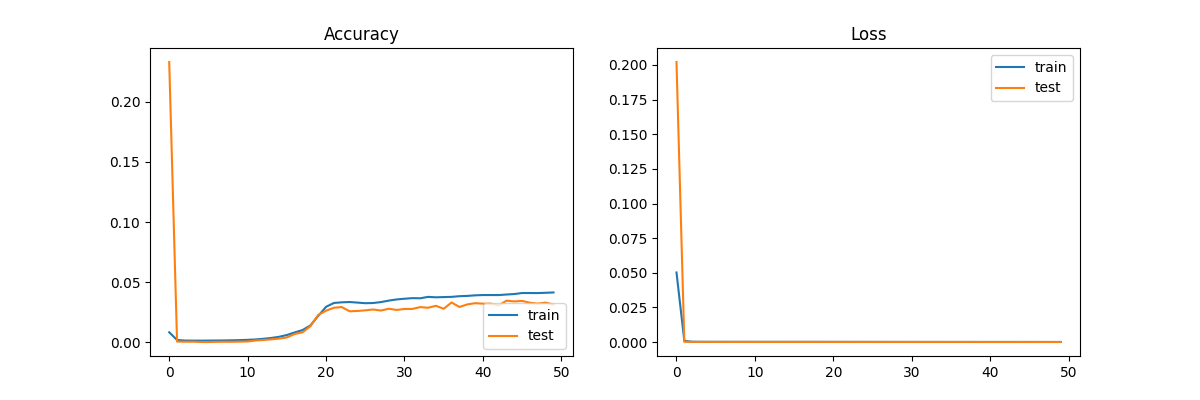

In [ ]:
model = tf.keras.models.load_model('hrnet_keypoints.keras')

56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 134ms/step


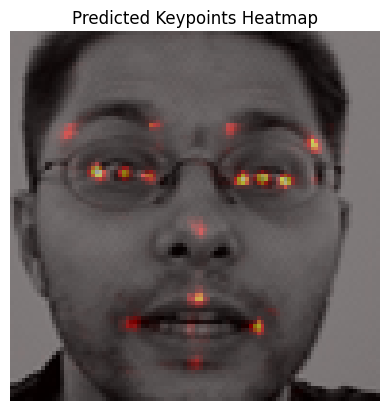

In [ ]:
predictions = model.predict(test_img)

plt.imshow(test_img[0].reshape((96, 96)), cmap='gray')
predict_show = np.sum(predictions[0], axis=-1)
plt.imshow(predict_show, cmap='hot', alpha=0.5)
plt.title("Predicted Keypoints Heatmap")
plt.axis('off')
plt.show()

For this phase of testing I wanted to test and understand larger known keypoint detection models so that I can use them for the data that is at my work. The HRNet is a model that encoporates training branches in parallel that keep the larger dimension images in training and ties it in with the lower dimension latent spaces. This model keeps communication with each of the branches so that each can use what is learned in the other branches as well. One thing that I wish I could've done for this model was use all of the augmented data in the training process to see how that would affect the results. Due to computation constraints I could only use the original data in the training phase. However, even with the limited data, I still believe that this method of training and model outperformed any of the models in the previous testing phase. This may be due to the method of training the model, though I do believe that having multiple branches running parallel to make predictions and having them communicate with each other does significantly help the understanding of the ai model. I definitly think that this architecture will be something that I focus on in my testing with the dataset at work, though for this case I do believe that this method allows for all of the keypoints to be detected which is a major gain than the previous phase. Additionally, I do believe more correlations and relationships within the data are made using a architecture such as this than a skip connection.